# Fourier Transforms in Python

To prepare this lecture, I had a very thorough look at the excellent book
***The Scientist and Engineer's Guide to Digital Signal Processing*** By Steven W. Smith

Fully available online!

http://www.dspguide.com/

#

Often, we work with encounter continuous functions which are defined over an infinite range. For instance when we consider the theoretical background of something, when we describe motion or time.

But when we measure, we have to measure discretely. 

Also, sometimes we are looking at the  the exact shape of the signals are not of interest, but we are concerned about the frequency of some signal. 

**Examples:**
* Audio-signal
* Laser linewidth
* Material resonance frequency
* Pendulum movement
...



In [2]:
# The usual!
import numpy as np
import matplotlib.pyplot as plt # For plotting
import pandas as pd # For loading and handling data
# all plots should appear directly within the notebook
%matplotlib inline

# seaborn just makes plots look a bit nicer - not
# absolutely necessary though.
import seaborn as sns
sns.set_style("whitegrid")


Text(0, 0.5, 'signal')

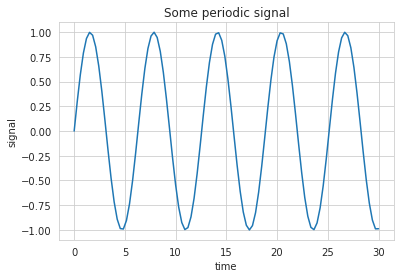

In [36]:
# Define a time-span with some resolution
t = np.linspace(0,30,100)

# And a function depending on time
y = np.sin(t) #+ np.cos(t*2)

# And plot it.
plt.title('Some periodic signal')
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('signal')
#plt.plot(t, y,'.')

But what if the signal is more complicated? It is obviously periodic, but what does it consist of?

And a real world example: Using the cell phone app Phyphox to record a trace of sound. 



Text(0.5, 1.0, 'Audio signal - snip')

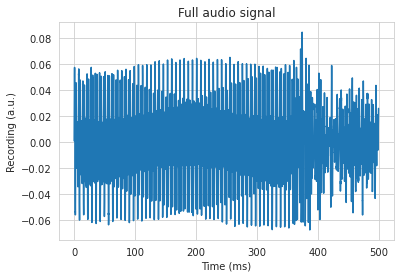

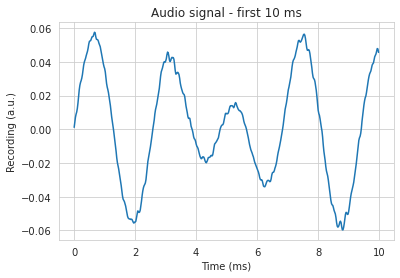

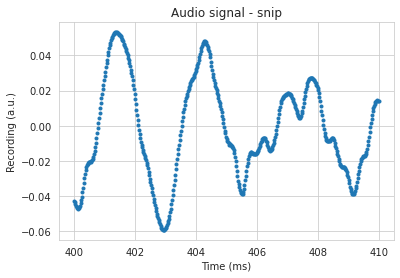

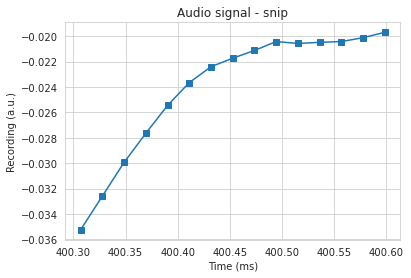

In [10]:
# Load data
data = pd.read_csv('Audio data.csv',delimiter=';')

# Assign headers as labels
labels = data.keys()

# Use the labels to extract data
t = np.array(data[labels[0]])
recording = np.array(data[labels[1]])

# Plot the data
plt.plot(t, recording)
plt.xlabel(labels[0]);plt.ylabel(labels[1]);plt.title('Full audio signal')

plt.figure()
plt.plot(t[(t<10)], recording[t<10])
plt.xlabel(labels[0]);plt.ylabel(labels[1]);plt.title('Audio signal - first 10 ms')

plt.figure()
plt.plot(t[(400<t)&(t<410)], recording[(400<t)&(t<410)],'.')
plt.xlabel(labels[0]);plt.ylabel(labels[1]);plt.title('Audio signal - snip')
#frequencies

plt.figure()
plt.plot(t[(400.3<t)&(t<400.6)], recording[(400.3<t)&(t<400.6)],'s-')
plt.xlabel(labels[0]);plt.ylabel(labels[1]);plt.title('Audio signal - snip')
#frequencies

#plt.plot(np.abs(np.fft.rfft(recording)))

# Fourier transforms

We know this for continuous functions, where we use it in quantum mechanics, mathematics, condensed matter, ...

Write a continuous function in terms of an infinite integral
\begin{align}
\tilde{f}(\kappa) = \int_{-\infty}^\infty f(x) e^{-i2\pi \kappa x} \, dx, 
\end{align}
where $\kappa$ is now a new parameter, depending inversely on the parameter $x$.


\begin{align}
f(x) = \int_{-\infty}^\infty \tilde{f}(\kappa) e^{i2\pi \kappa x} \, dx, 
\end{align}

For real $f(x)$
\begin{align}
\tilde{f}(\kappa) = 2 \int_{0}^\infty Re\,\tilde{f}(\kappa) \cos(2\pi \kappa x) + Im\,\tilde{f}\sin(2\pi \kappa x) \, dx, 
\end{align}
By this reformulation, a lot of equations become easier to solve. 

But now we deal with measurements containing discrete points.

# Fourier transforms of discrete data

Express a time series $f[t]$ with $n$ points as a sum of cosines and sines - $n/2+1$ cosines and $n/2+1$ sines if n is even, and $(n+1)/2$ if $n$ is odd.

We can write it as
$$
\begin{align}
    f[x] = \sum_{k=0}^{N/2} a[k] \cos(2 \pi x k/N) + \sum_{k=0}^{N/2} b[k] \sin(2 \pi x k/N)
\end{align}
$$
where $a$ and $b$ are coefficients determining the amplitudes of sine and cosine functions.

To arrive at frequencies, we need to normalize $a$ and $b$. We will label the normalized values $RE\, X[k]$ and $IM\, X[k]$ - but more on that later.

Let's just think about what these sines and cosines are:

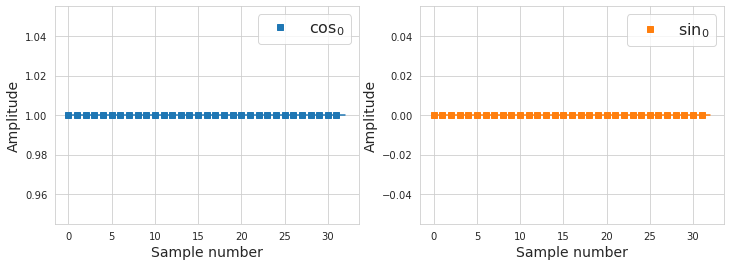

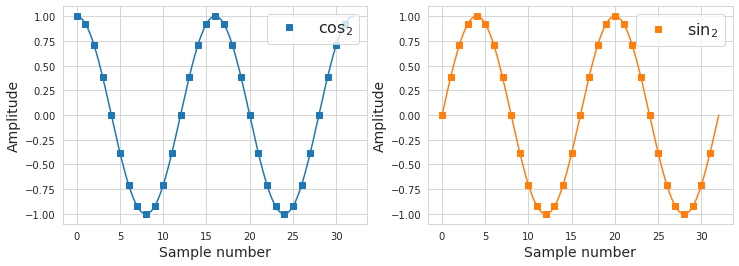

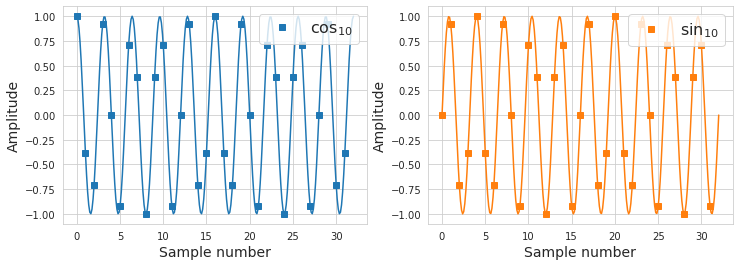

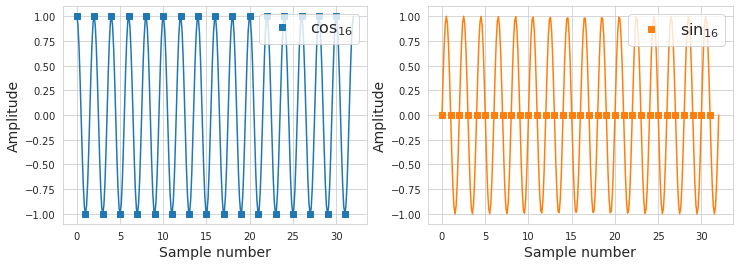

In [35]:
numberOfDatapoints = 32 # We want some number of datapoints.

sampleNumber = np.arange(0,numberOfDatapoints)
plotPoints = np.linspace(0,numberOfDatapoints,256)

# Now we illustrate what the basis functions look like.

# Here I use i for k - not so smart, but 
for i in [0,2,10,16]:
    # Make a new figure
    plt.figure(figsize=(12,4))
    
    axs = [plt.subplot2grid((1,2),(0,0)), plt.subplot2grid((1,2),(0,1))]
    
    l, = axs[0].plot(plotPoints,np.cos(plotPoints*i*2*np.pi/(numberOfDatapoints)))
    axs[0].plot(np.cos(sampleNumber*i*2*np.pi/(numberOfDatapoints)),'s', color = l.get_color(),
               label = r'cos$_{'+str(i)+r'}$')
    
    l, = axs[1].plot(plotPoints,np.sin(plotPoints*i*2*np.pi/(numberOfDatapoints)), color = 'C1')
    axs[1].plot(np.sin(sampleNumber*i*2*np.pi/(numberOfDatapoints)),'s', color = l.get_color(),
                label = r'sin$_{'+str(i)+r'}$')
    
    axs[0].legend(fontsize=16, loc='upper right'); axs[1].legend(fontsize=16, loc='upper right')
    
    axs[0].set_xlabel('Sample number', fontsize = 14);axs[0].set_ylabel('Amplitude', fontsize = 14)
    axs[1].set_xlabel('Sample number', fontsize = 14);axs[1].set_ylabel('Amplitude', fontsize = 14)
    

**We notice a few things!**

* All samples in the 0th cosine has the same value - This is a DC offset
* All samples in the 0th sine is 0.
* All samples in the 16th sine is 0.

* The 10th sine and cosine seem like undersampling. 


Remember what is happening:

The value of the basis functions at each sample point are weighted with $RE\, X[k]$ or $IM\, X[k]$ and summed together to create the initial function.

Notice that when we set $IM\,X[0]$ and $IM\,X[-1]$ (last element) to zero, we have N sample points and get N new variables out - the values of $RE\, X[k]$ and $IM\, X[k]$.


More generally, we see that k corresponds to a frequency: A number of oscillations over the number of samples. For N sample points we can distinguish oscillations with up to N/2 periods.


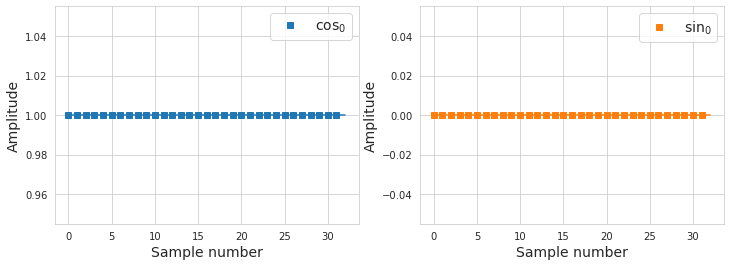

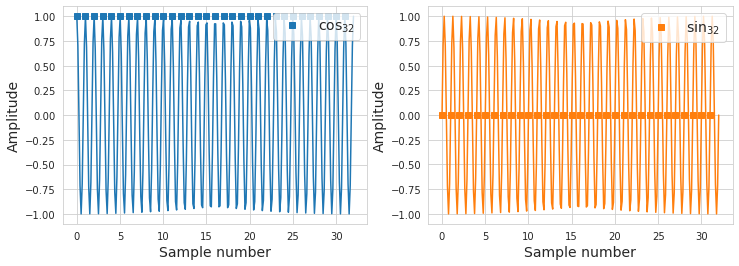

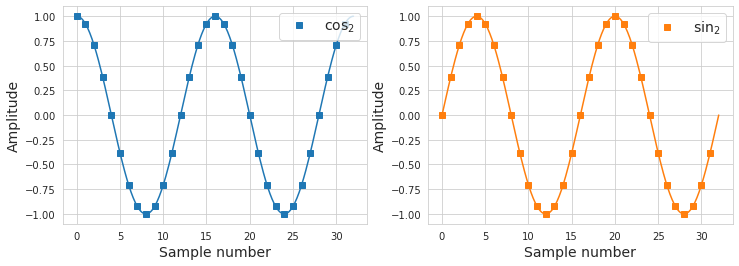

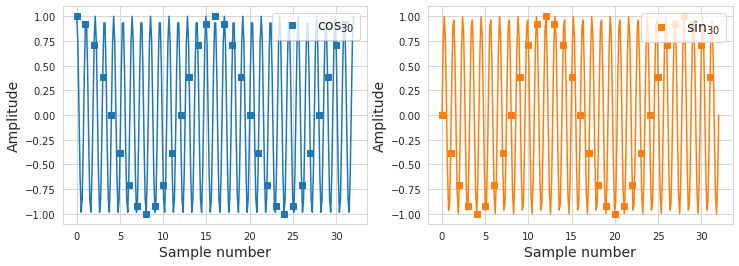

In [6]:
for i in [0,32, 2, 30]:
    # Make a new figure
    plt.figure(figsize=(12,4))
    
    
    axs = [plt.subplot2grid((1,2),(0,0)), plt.subplot2grid((1,2),(0,1))]
    
    l, = axs[0].plot(plotPoints,np.cos(plotPoints*i*2*np.pi/(numberOfDatapoints)))
    axs[0].plot(np.cos(sampleNumber*i*2*np.pi/(numberOfDatapoints)),'s', color = l.get_color(),
               label = r'cos$_{'+str(i)+r'}$')
    
    l, = axs[1].plot(plotPoints,np.sin(plotPoints*i*2*np.pi/(numberOfDatapoints)), color = 'C1')
    axs[1].plot(np.sin(sampleNumber*i*2*np.pi/(numberOfDatapoints)),'s', color = l.get_color(),
                label = r'sin$_{'+str(i)+r'}$')
    
    axs[0].legend(fontsize=14, loc='upper right'); axs[1].legend(fontsize=14, loc='upper right')
    
    axs[0].set_xlabel('Sample number', fontsize = 14);axs[0].set_ylabel('Amplitude', fontsize = 14)
    axs[1].set_xlabel('Sample number', fontsize = 14);axs[1].set_ylabel('Amplitude', fontsize = 14)

# Sample size and time series length determines frequency scale

The frequencies we can measure are determined by the length of the time series and the number of samples in the time series. 

We can measure frequencies up to **half of the sampling rate**.




Frequency resolution is given by

$f_{max} = 1/(2 \Delta t) $

Number of datapoints: How high frequency we can measure.

If we keep the time fixed but double the number of points, we can measure up to higher frequencies.

$\Delta f = 1/max(t)$

Length of time-series: If we double the length in time and the number of points - thus keeping the relation of points/time, we double the resolution: We have more 'intermediate' frequencies.

**Resolution in one domain determines absolute scale in the other domain.**


# First example!
We use the numpy **Fast Fourier Transform** module.

https://numpy.org/doc/stable/reference/routines.fft.html

Fast way of calculating the discrete Fourier transform.


In [ ]:
# Define a time-span with some resolution - 20 s with 100 points.
numberOfPoints = 100
t = np.linspace(0,10-10/numberOfPoints,numberOfPoints)

print('sampling rate',1/(t[1]-t[0]))

# And a function depending on time
y = np.sin(0.5*t*2*np.pi) + np.cos(t*2*2*np.pi)*0.2#  + np.cos(t*4)

# And plot it.
plt.title('Some periodic signal in time')
plt.plot(t, y)
plt.xlabel('time (s)'); plt.ylabel('signal')
plt.plot(t, y,'.')

ft = np.fft.rfft(y)
print(ft)

frequencies = np.linspace(0, 1/(t[1]-t[0])/2, int(len(t)/2+1))


plt.figure()
plt.plot(frequencies,np.real(ft),'s-', label='RE X')
plt.plot(frequencies,np.imag(ft),'s-', label='IM X')
plt.xlabel('frequency (Hz)');plt.ylabel('amplitudes');plt.title('Fourier transform')
plt.legend()


## Polar form
The $RE\, X [k]$ and $IM\, X [k]$ are not super intuitive to use for understanding what is going on in frequency space, but they are the return values from the Fourier transform algorithms we will use later. 


<img src="figs/polar.png" width="300" />

We can also write
$$
\begin{align}
    f[x] = \sum_{k=0}^{N/2} m[k] \cos(2 \pi x k/N + \phi[k])
\end{align}
$$
where $m$ is the magnitude of a single cosine, and $\phi$ is the phase. We will label the normalized $m$ with $M$.

We call this the **polar** form.

And we can convert between the normalized magnitude and the phase and the normalized amplitudes via
$$\begin{align}
M = \sqrt{RE\,X[k]^2+IM\, X[k]^2},\quad \quad \phi = \arctan\left(\frac{IM\,X[k]}{RE\, X[k]}\right)
\end{align}
$$




65 65


Text(0.5, 1.0, 'Phase')

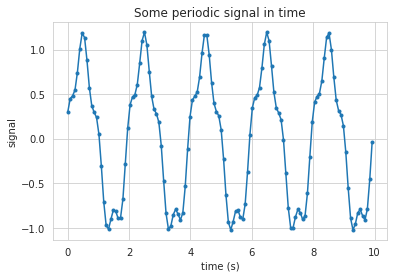

<Figure size 432x288 with 0 Axes>

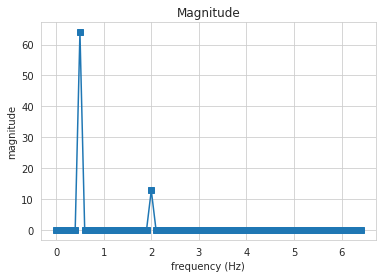

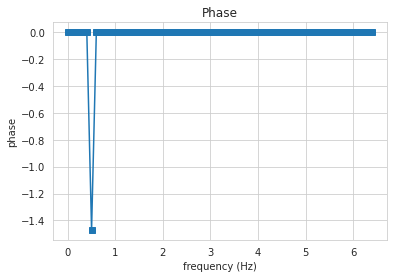

In [31]:
# Define a time-span with some resolution - 20 s with 100 points.
t = np.linspace(0,10-10/128,128)


# And a function depending on time
y = np.sin(0.5*t*2*np.pi+0.1) + np.cos(t*2*2*np.pi)*0.2#  + np.cos(t*4)

# And plot it.
plt.title('Some periodic signal in time')
plt.plot(t, y,'.-')
plt.xlabel('time (s)'); plt.ylabel('signal')

ft = np.fft.rfft(y)
ft
plt.figure()

frequencies = np.linspace(0, 1/(t[1]-t[0])/2, int(len(t)/2+1))

print(len(ft), len(frequencies))
plt.figure()
plt.plot(frequencies,np.abs(ft),'s-')
plt.xlabel('frequency (Hz)');plt.ylabel('magnitude');plt.title('Magnitude')

plt.figure()
plt.plot(frequencies,np.arctan(np.imag(ft)/(np.real(ft)+1e-10)),'s-')
#plt.plot(frequencies,np.arctan2(np.imag(ft),(np.real(ft)+1e-10)),'s-')
plt.xlabel('frequency (Hz)');plt.ylabel('phase');plt.title('Phase')

#ALTERNATIVELY
#plt.plot(frequencies,np.angle(ft))



## Normalization
We already mentioned the normalization above.

The frequency domain of the signal is different by a normalization factor from the amplitudes needed to replicate the signal. The normalization comes from the power in each frequency **bin**.

Recall
\begin{align}
    f[x] = \sum_{k=0}^{N/2} a[k] \cos(2 \pi x k/N) + \sum_{k=0}^{N/2} b[k] \sin(2 \pi x k/N)
\end{align}

In the end we will work with the amplitudes of the frequency components, $RE\, X [k]$ and $IM\, X [k]$. These are also the components we will obtain when we run the Fourier transform algorithms. 

Therefore, we consider how we switch BACK TO $a$ and $b$ FROM $RE\, X [k]$ and $IM\, X [k]$ rather than the other way.

$$
\begin{align}
    a[k\neq (0,N/2)] = \frac{RE\, X [k]}{N/2},\quad \quad
    b[k] = \frac{IM\, X [k]}{N/2}
\end{align}
$$
EXCEPT for the special edge case!
\begin{align}
    a[0] = \frac{RE\, X [0]}{N}\quad \quad
    a[N/2] = \frac{IM\, X [N/2]}{N}
\end{align}

How can we understand this normalization?




Text(0.5, 1.0, 'Illustration of normalization')

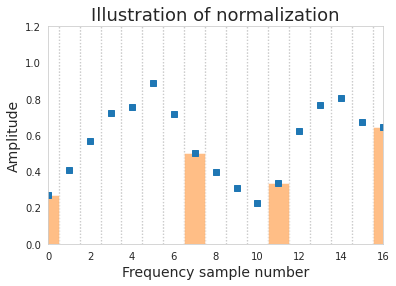

In [100]:
plt.plot()
ax = plt.gca()
#fig, ax = plt.subplots()
#ax.set_yticks([0.2, 0.6, 0.8], minor=False)

frequencySignal = np.sin(sampleNumber[:len(sampleNumber)//2+1]/3)**2*0.5+np.random.rand(len(sampleNumber)//2+1)*0.2+0.2

ax.plot(sampleNumber[:len(sampleNumber)//2+1], frequencySignal,'s')
ax.set_xticks([i+1/2 for i in sampleNumber//2], minor=True)
ax.xaxis.grid(False, which='major')
ax.xaxis.grid(True, linestyle=':', lw = 1.2, which='minor')
ax.yaxis.grid(False, which='major')
ax.set_ylim(0,1.2)
ax.set_xlim(0,len(sampleNumber)/2)

plt.bar([0,7,11,16],[frequencySignal[0],frequencySignal[7],frequencySignal[11],frequencySignal[16]], alpha=0.5, width=1, color = 'C1')


ax.set_xlabel('Frequency sample number', fontsize = 14)
ax.set_ylabel('Amplitude', fontsize=14)
plt.title('Illustration of normalization', fontsize = 18)

The value we find at $k=7$ must be distributed over a full bin, which is $2/N$ wide, while for $k=0$ and $k=N/2$, the width of the window is only half a bin, thus $1/N$. 